In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def forex_simulation(budget_inr, inr_to_foreign_direct, inr_to_usd, usd_to_foreign):
    """
    Compare INR→Foreign vs INR→USD→Foreign and compute break-even.
    """
    # Option 1: Direct INR → Foreign
    foreign_direct = budget_inr / inr_to_foreign_direct

    # Option 2: INR → USD → Foreign
    usd_amount = budget_inr / inr_to_usd
    foreign_via_usd = usd_amount * usd_to_foreign

    # Break-even INR→Foreign rate
    break_even_inr_to_foreign = budget_inr / foreign_via_usd if foreign_via_usd > 0 else None

    # Break-even USD→Foreign rate
    break_even_usd_to_foreign = inr_to_usd / inr_to_foreign_direct if inr_to_foreign_direct > 0 else None

    return {
        "Foreign via Direct (India)": foreign_direct,
        "Foreign via USD abroad": foreign_via_usd,
        "Break-even INR/Foreign": break_even_inr_to_foreign,
        "Break-even USD/Foreign": break_even_usd_to_foreign
    }


def plot_forex_graph(budget_inr, inr_to_foreign_direct, inr_to_usd, usd_to_foreign_range):
    """
    Plot comparison of INR→Foreign vs INR→USD→Foreign over a range of USD→Foreign rates.
    """
    usd_rates = np.linspace(min(usd_to_foreign_range), max(usd_to_foreign_range), 100)

    # Direct INR→Foreign is constant
    foreign_direct = budget_inr / inr_to_foreign_direct

    # Via USD→Foreign varies with USD→Foreign rate
    usd_amount = budget_inr / inr_to_usd
    foreign_via_usd = usd_amount * usd_rates

    # Calculate break-even
    break_even_usd_to_foreign = inr_to_usd / inr_to_foreign_direct
    break_even_foreign = foreign_direct

    # Plot
    plt.figure(figsize=(8, 5))
    plt.axhline(y=foreign_direct, color='r', linestyle='--', label=f"Direct INR→Foreign ({foreign_direct:.0f})")
    plt.plot(usd_rates, foreign_via_usd, label="Via USD abroad", color='b')
    plt.axvline(x=break_even_usd_to_foreign, color='g', linestyle=':', 
                label=f"Break-even USD→Foreign: {break_even_usd_to_foreign:.2f}")

    plt.xlabel("USD → Foreign exchange rate")
    plt.ylabel("Foreign currency obtained")
    plt.title("Direct INR vs Via USD Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()


                  Scenario       Value
Foreign via Direct (India) 7462.686567
    Foreign via USD abroad 7519.640853
    Break-even INR/Foreign   13.298507
    Break-even USD/Foreign    6.649254


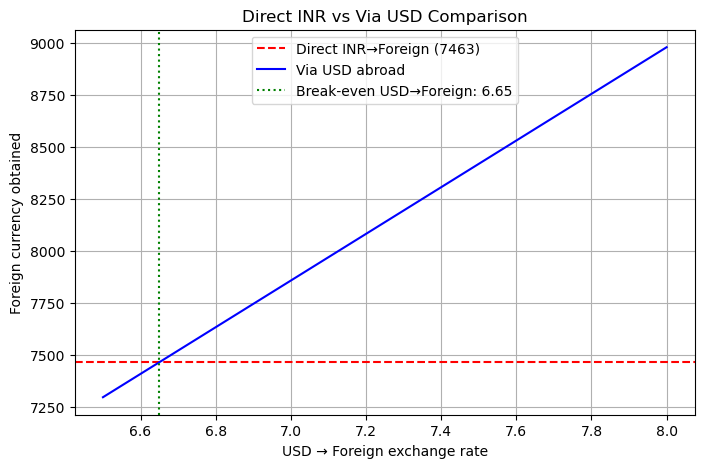

In [13]:

# ---------------- Example Run ----------------
budget = 100000

# Russia case
inr_to_rub_direct = 13.4   # INR per RUB
inr_to_usd = 89.1          # INR per USD
usd_to_rub = 6.7            # RUB per USD (example current rate)
usd_to_rub_range = (6.5, 8)

result = forex_simulation(budget, inr_to_rub_direct, inr_to_usd, usd_to_rub)

# Convert dict → DataFrame for tabular output
df = pd.DataFrame(result.items(), columns=["Scenario", "Value"])
print(df.to_string(index=False))

plot_forex_graph(budget, inr_to_rub_direct, inr_to_usd, usd_to_rub_range)
